In [54]:
# importing numpy library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

<h1>Data Collection & Pre-Processing<h1>

In [55]:
# loading the data from csv file to a pandas Dataframe
raw_mail_data = pd.read_csv('spam.csv')
raw_mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [56]:
# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

# printing the first 5 rows of the dataframe
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [57]:
mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

In [58]:
X = mail_data['Message']

Y = mail_data['Category']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [59]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)


# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [60]:
class Logistic_Regression():


  # declaring learning rate & number of iterations (Hyperparametes)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations



  # fit function to train the model with dataset
  def fit(self, X, Y):

    # number of data points in the dataset (number of rows)  -->  m
    # number of input features in the dataset (number of columns)  --> n
    self.m, self.n = X.shape


    #initiating weight & bias value

    self.w = np.zeros(self.n)
    
    self.b = 0

    self.X = X

    self.Y = Y


    # implementing Gradient Descent for Optimization

    for i in range(self.no_of_iterations):
      self.update_weights()



  def update_weights(self):

    # Y_hat formula (sigmoid function)

    Y_hat = 1 / (1 + np.exp( - (self.X.dot(self.w) + self.b ) ))    


    # derivaties

    dw = (1/self.m)*np.dot(self.X.T, (Y_hat - self.Y))

    db = (1/self.m)*np.sum(Y_hat - self.Y)


    # updating the weights & bias using gradient descent

    self.w = self.w - self.learning_rate * dw

    self.b = self.b - self.learning_rate * db


  # Sigmoid Equation & Decision Boundary

  def predict(self, X):

    Y_pred = 1 / (1 + np.exp( - (X.dot(self.w) + self.b ) )) 
    Y_pred = np.where( Y_pred > 0.5, 1, 0)
    return Y_pred
  def predict1(self, X):

    Y_pred = 1 / (1 + np.exp( - (X.dot(self.w) + self.b ) )) 
    # Y_pred = np.where( Y_pred > 0.5, 1, 0)
    return Y_pred

In [61]:
model=Logistic_Regression(0.01,1000)

model.fit(X_train_features.toarray(),Y_train)

prediction_on_training_data = model.predict(X_train_features.toarray())

accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.8671752299753197


In [62]:
prediction_on_test_data = model.predict(X_test_features.toarray())

accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

print('Accuracy on testing data : ', accuracy_on_test_data)

Accuracy on testing data :  0.8609865470852018


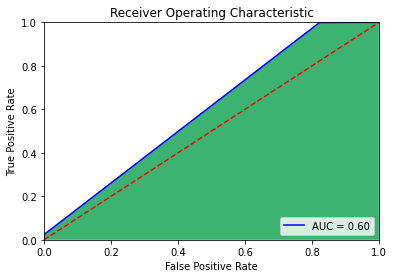

In [68]:
prediction_on_training_data = model.predict1(X_train_features.toarray())
fpr=[] 
tpr=[]
thresholds = np.arange(0.0, 1.01, .01)
P = sum(Y_train)
N = len(Y_train) - P
for thresh in thresholds:
    FP=0
    TP=0
    for i in range(len(prediction_on_training_data)):
        if (prediction_on_training_data[i] > thresh):
            if Y_train.values[i] == 1:
                TP = TP + 1
            if Y_train.values[i] == 0:
                FP = FP + 1
    fpr.append(FP/float(N))
    tpr.append(TP/float(P))
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.fill_between(fpr, tpr,  facecolor='mediumseagreen', interpolate=True)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()